### Required Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data

In [2]:
df = pd.read_csv('Datasets/MultipleLR.csv', header=None)
df.head(2)

,0,1,2,3
0,73,80,75,152
1,93,88,93,185


In [3]:
df.columns = ['X1', 'X2', 'X3', 'Y']

In [4]:
df.head(2)

,X1,X2,X3,Y
0,73,80,75,152
1,93,88,93,185


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      25 non-null     int64
 1   X2      25 non-null     int64
 2   X3      25 non-null     int64
 3   Y       25 non-null     int64
dtypes: int64(4)
memory usage: 928.0 bytes


In [6]:
(df.describe().T).loc[:, ['mean', 'std', 'min', 'max']]

,mean,std,min,max
X1,79.04,12.279658,47.0,96.0
X2,79.48,12.503733,46.0,98.0
X3,81.48,11.765486,55.0,100.0
Y,162.04,24.044195,101.0,196.0


In [7]:
features = df.iloc[:, 0:3]
features = np.concatenate((features, np.ones(25).reshape(25,1)), axis=1)
label = df.iloc[:, 3]
label = np.array(label)

In [8]:
features

array([[ 73.,  80.,  75.,   1.],
       [ 93.,  88.,  93.,   1.],
       [ 89.,  91.,  90.,   1.],
       [ 96.,  98., 100.,   1.],
       [ 73.,  66.,  70.,   1.],
       [ 53.,  46.,  55.,   1.],
       [ 69.,  74.,  77.,   1.],
       [ 47.,  56.,  60.,   1.],
       [ 87.,  79.,  90.,   1.],
       [ 79.,  70.,  88.,   1.],
       [ 69.,  70.,  73.,   1.],
       [ 70.,  65.,  74.,   1.],
       [ 93.,  95.,  91.,   1.],
       [ 79.,  80.,  73.,   1.],
       [ 70.,  73.,  78.,   1.],
       [ 93.,  89.,  96.,   1.],
       [ 78.,  75.,  68.,   1.],
       [ 81.,  90.,  93.,   1.],
       [ 88.,  92.,  86.,   1.],
       [ 78.,  83.,  77.,   1.],
       [ 82.,  86.,  90.,   1.],
       [ 86.,  82.,  89.,   1.],
       [ 78.,  83.,  85.,   1.],
       [ 76.,  83.,  71.,   1.],
       [ 96.,  93.,  95.,   1.]])

In [9]:
label

array([152, 185, 180, 196, 142, 101, 149, 115, 175, 164, 141, 141, 184,
       152, 148, 192, 147, 183, 177, 159, 177, 175, 175, 149, 192],
      dtype=int64)

### Linear Regression

In [10]:
def cost_fn(y, Y_Pred, size_):
    error = Y_Pred - y.reshape(-1, 1)
    return error, np.sum(error**2) / ((size_))

In [13]:
def LR(X,y, alpha=1e-4, threshold=1e-2, n_iter=10000):
    
    thetas = np.ones(X.shape[1], dtype='float64').reshape(-1,1)
    
    costs = []
    thetas_list = []
    
    thetas_list.append(thetas)
    
    size_data = len(y)
    
    for i in range(n_iter):
        
        y_pred = X.dot(thetas)
        
        err, cost = cost_fn(y, y_pred, size_data)
        costs.append(cost)
        
        thetas_grad = (alpha / size_data) * (X.T @ (err))
        thetas = thetas - thetas_grad 
        
        thetas_list.append(thetas)
        
        if (i > 0) and np.all(np.abs(costs[i] - costs[i - 1]) < threshold):
            print("Takes {} iterations".format((i+1)))
            break
    
    return costs, thetas_list, thetas

In [14]:
costs, thetas_list, thetas = LR(features, label)

Takes 212 iterations


In [15]:
thetas

array([[0.59812814],
       [0.59562777],
       [0.81613796],
       [0.99497691]])

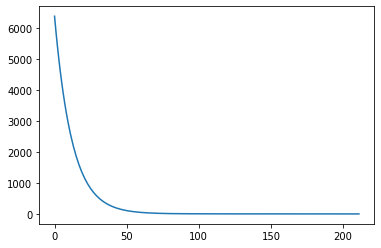

In [17]:
plt.plot(np.arange(212), costs)
plt.show()

In [18]:
from sklearn.metrics import r2_score

y_pred = features.dot(thetas)
accuracy = r2_score(label, y_pred) * 100

print("Accuracy:" , accuracy, "%")

Accuracy: 98.38823026842124 %
